In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
rs = 123

In [4]:
data = pd.read_csv("food_items.csv")
data

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,'In Moderation'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13255,140.0,5,1.0,0.0,0.0,0.0,0,60.0,23.0,2.0,13.0,0,2.0,0,0,0,4,'In Moderation'
13256,130.0,4,0.5,0.0,0.0,0.0,0,50.0,23.0,1.0,14.0,0,2.0,0,0,0,4,'In Moderation'
13257,140.0,3,0.0,0.0,0.0,0.0,0,130.0,26.0,2.0,15.0,0,1.0,0,0,0,2,'In Moderation'
13258,140.0,3,0.5,0.0,0.0,0.0,0,55.0,27.0,2.0,17.0,0,1.0,0,0,0,2,'In Moderation'


In [6]:
data.dtypes

Calories               float64
Total Fat                int64
Saturated Fat          float64
Monounsaturated Fat    float64
Polyunsaturated Fat    float64
Trans Fat              float64
Cholesterol              int64
Sodium                 float64
Total Carbohydrate     float64
Dietary Fiber          float64
Sugars                 float64
Sugar Alcohol            int64
Protein                float64
Vitamin A                int64
Vitamin C                int64
Calcium                  int64
Iron                     int64
class                   object
dtype: object

In [7]:
feature_cols = list(data.iloc[:,:-1].columns)

In [8]:
feature_cols

['Calories',
 'Total Fat',
 'Saturated Fat',
 'Monounsaturated Fat',
 'Polyunsaturated Fat',
 'Trans Fat',
 'Cholesterol',
 'Sodium',
 'Total Carbohydrate',
 'Dietary Fiber',
 'Sugars',
 'Sugar Alcohol',
 'Protein',
 'Vitamin A',
 'Vitamin C',
 'Calcium',
 'Iron']

In [9]:
x_raw = data.iloc[:, :-1]
y_raw = data.iloc[:, -1:]

In [11]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [12]:
x = scaler.fit_transform(x_raw)

In [13]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [14]:
y = label_encoder.fit_transform(y_raw.values.ravel())

In [15]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
x

array([[0.06742081, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05565611, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0678733 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06334842, 0.06976744, 0.        , ..., 0.        , 0.        ,
        0.01176471],
       [0.06334842, 0.06976744, 0.02272727, ..., 0.        , 0.        ,
        0.01176471],
       [0.05429864, 0.09302326, 0.02272727, ..., 0.        , 0.        ,
        0.02352941]])

In [17]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([6649, 5621,  990], dtype=int64))

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, stratify=y, random_state=123)

In [23]:
l2_model = LogisticRegression(random_state=123, penalty='l2', multi_class='multinomial', solver = 'lbfgs', max_iter=1000)

In [24]:
l2_model.fit(x_train, y_train)

c:\Users\roshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=123)

In [25]:
l2_preds = l2_model.predict(x_test)

In [26]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [27]:
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.7748868778280543,
 'recall': array([0.87368421, 0.73220641, 0.35353535]),
 'precision': array([0.73035827, 0.83553299, 0.92105263]),
 'f1score': array([0.79561794, 0.78046468, 0.51094891])}

In [30]:
l1_model = LogisticRegression(random_state=123, penalty='l1', multi_class='multinomial', solver='saga', max_iter=1000)

In [31]:
l1_model.fit(x_train, y_train)

c:\Users\roshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='l1',
                   random_state=123, solver='saga')

In [32]:
l1_preds = l1_model.predict(x_test)
l1_preds

array([1, 1, 1, ..., 0, 0, 1])

In [33]:
odd_ratio = l2_model.predict_proba(x_test[:1, :])[0]
odd_ratio

array([0.07041148, 0.92418911, 0.00539941])

In [35]:
l1_model.predict(x_test[:1, :])[0]

1

In [36]:
evaluate_metrics(y_test, l1_preds)

{'accuracy': 0.8092006033182504,
 'recall': array([0.85488722, 0.74377224, 0.87373737]),
 'precision': array([0.78848821, 0.83516484, 0.8277512 ]),
 'f1score': array([0.82034632, 0.78682353, 0.85012285])}

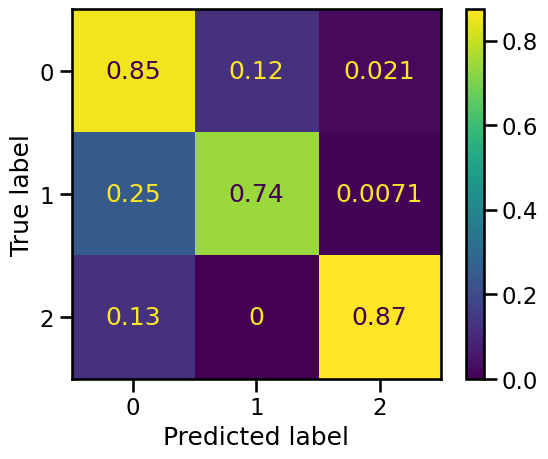

In [37]:
cf = confusion_matrix(y_test, l1_preds, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=l1_model.classes_)
disp.plot()
plt.show()